# Cat vs Dog Image Classification – CNN Project Overview

---

### 👤 Author’s Note

Hi, I’m **Bo Fu** – an experienced software engineer transitioning into the field of AI. I’ve been accepted into the MSc Artificial Intelligence program at *City, University of London*.

To build a strong foundation before the program starts, I’m actively developing deep learning projects from scratch — combining self-study with hands-on experimentation. This project reflects my personal exploration of Convolutional Neural Networks, from data preparation to model architecture and final evaluation. It is structured for clarity and reproducibility — both for myself and others who might learn from or improve upon it.

🔗 [LinkedIn](https://www.linkedin.com/in/bofu/)  
📅 Completed: June 2025

> This notebook is a work in progress — feedback, suggestions, or pull requests are welcome.

---

### 📘 Project Summary

This notebook builds and evaluates several Convolutional Neural Network (CNN) models to classify cat and dog images. The training pipeline includes:

- Multiple input image resolutions (50×50, 96×96, 160×160, 224×224, 256×256)
- Different data augmentation strategies
- Training with early stopping and history tracking
- Final evaluation on an unseen test dataset
- Also available as a [Kaggle Notebook](https://www.kaggle.com/code/bofu001/catdog-cnn-from-scratch)

---

### 📂 Dataset

- **Source**: The dataset is obtained from the [Kaggle Dogs vs. Cats competition](https://www.kaggle.com/competitions/dogs-vs-cats/data).
- **Original Format**: All images are stored in a single folder and named as `cat.#.jpg` or `dog.#.jpg`.

**Custom Split:**

- **Training + Validation**:
  - 10,000 cat images: `cat.0.jpg` to `cat.9999.jpg`
  - 10,000 dog images: `dog.0.jpg` to `dog.9999.jpg`
  - These were placed in `train_val_ds/cats/` and `train_val_ds/dogs/`

- **Test Set**:
  - 2,500 cat images: `cat.10000.jpg` to `cat.12499.jpg`
  - 2,500 dog images: `dog.10000.jpg` to `dog.12499.jpg`
  - These were placed in `test_ds/cats/` and `test_ds/dogs/`

> 🧾 **Note**: Due to file size limitations and licensing restrictions, the image dataset is not included in this repository. Please download it from Kaggle and organize the images as described above. The folders `train_val_ds/` and `test_ds/` are included as empty placeholders to preserve the project’s directory structure—please populate them with the appropriate images before running the code.

---

### 🧠 Model Variants and Numbering

| Model No.  | Model Name                            | Architecture     | Image Size | Augmentation         | Epochs | Callback         |
|------------|---------------------------------------|------------------|------------|----------------------|--------|------------------|
| No. 1      |   model_v1_img50                      | create_model_v1  | 50×50      | None                 | 10     | None             |
| No. 2      |   model_v1_img96                      | create_model_v1  | 96×96      | None                 | 10     | None             |
| No. 3      |   model_v1_img50_augv1                | create_model_v1  | 50×50      | data_augmentation_v1 | 10     | None             |
| No. 4      |   model_v1_img96_augv1                | create_model_v1  | 96×96      | data_augmentation_v1 | 10     | None             |
| No. 5      |   model_v1_img96_augv1_e20_es3        | create_model_v1  | 96×96      | data_augmentation_v1 | 20     | early_stop_es3   |
| No. 6      |   model_v1_img96_augv2_e20_es3        | create_model_v1  | 96×96      | data_augmentation_v2 | 20     | early_stop_es3   |
| No. 7      |   model_v2_img96_augv1_e20_es3        | create_model_v2  | 96×96      | data_augmentation_v1 | 20     | early_stop_es3   |
| No. 8      |   model_v2_img96_augv2_e20_es3        | create_model_v2  | 96×96      | data_augmentation_v2 | 20     | early_stop_es3   |
| No. 9      |   model_v2_img96_augv1_e25_es8        | create_model_v2  | 96×96      | data_augmentation_v1 | 25     | early_stop_es8   |
| No. 10     |   model_v2_img96_augv2_e25_es8        | create_model_v2  | 96×96      | data_augmentation_v2 | 25     | early_stop_es8   |
| No. 11     |   model_v3_img160_augv1_e30_es8       | create_model_v3  | 160×160    | data_augmentation_v1 | 30     | early_stop_es8   |
| No. 12     |   model_v3_img160_augv2_e30_es8       | create_model_v3  | 160×160    | data_augmentation_v2 | 30     | early_stop_es8   |
| No. 13     |   model_v3_img224_augv2_e40_es10      | create_model_v3  | 224×224    | data_augmentation_v2 | 40     | early_stop_es10  |
| No. 14     |   model_v3_img256_augv2_e45_es12      | create_model_v3  | 256×256    | data_augmentation_v2 | 45     | early_stop_es12  |

> ⚠️ All models are saved using `ModelCheckpoint` to retain the best validation accuracy.

---

### 🏆 Best Results

| Model No.   | Model Name                     | Train Accuracy | Val Accuracy | Precision | F1-Score  |
|-------------|--------------------------------|----------------|--------------|-----------|-----------|
|   No. 13    | model_v3_img224_augv2_e40_es10 | 95.1%          | 92.0%        |   95.7%   |   94.9%   |

---

### ▶️ How to Run

1. **Prepare the Datasets**:
   - Place the training set (with `cats/`, `dogs/`) inside the `train_val_ds/` folder  
   - Place the test set (with `cats/`, `dogs/`) inside the `test_ds/` folder

2. **Set Parameters**:
   - Configure the environment at the top of the notebook (`LOCAL` or `KAGGLE`)
   - All paths and hyperparameters (e.g., `SEED`, `BATCH_SIZE`) are defined centrally

3. **Modularized Codebase**:
   - `data_utils.py`: data loading + preprocessing
   - `model_creation.py`: model definitions
   - `train.py`: training pipeline
   - `visualization.py`: plots
   - `evaluation.py`: metrics + visual predictions

4. **Review the Results**:
   - Training curves (accuracy/loss)
   - Confusion matrix with precision and F1-score
   - Visual sample predictions

In [1]:
# Built-in
import random
import os

# Third-party
import tensorflow as tf
import numpy as np
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras import layers

# Custom modules
from model_creation import create_model_v1
from train import get_model_and_history
from visualization import plot_training_history
from data_utils import load_train_val_ds, load_test_ds, normalize_ds, augment_ds
from evaluation import evaluate_model, show_predictions

In [2]:
# Set data and model paths based on environment
LOCAL = 1
KAGGLE = 2
environment = LOCAL  # Change to KAGGLE when running on Kaggle

# Define paths
if environment == LOCAL:
    train_val_ds_dir = "./train_val_ds"
    test_ds_dir = "./test_ds"
    model_dir = "./models"
elif environment == KAGGLE:
    train_val_ds_dir = "/kaggle/input/catdog_cnn_from_scratch/train_val_ds"
    test_ds_dir = "/kaggle/input/catdog_cnn_from_scratch/test_ds"
    model_dir = "/kaggle/working"
else:
    raise ValueError("Invalid environment setting.")

In [3]:
# Configuration section
SEED = 123
VAL_SPLIT = 0.3
BATCH_SIZE = 32

# Apply seed globally
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

## Model No. 1: model_v1_img50
- Image size: 50x50
- Architecture: create_model_v1
- Epochs: 10

In [4]:
# Load training and validation datasets with 50x50 image size
img_size_50 = (50, 50)
train_dataset_50, val_dataset_50 = load_train_val_ds(img_size_50, train_val_ds_dir, SEED, BATCH_SIZE, VAL_SPLIT)
train_dataset_50_norm = normalize_ds(train_dataset_50)
val_dataset_50_norm = normalize_ds(val_dataset_50)

Found 20000 files belonging to 2 classes.
Using 14000 files for training.
Found 20000 files belonging to 2 classes.
Using 6000 files for validation.


In [5]:
# Train or load model for 50x50 input resolution
model_name = "model_v1_img50.keras"
history_name = "model_v1_img50_history.pkl"
model_v1_img50, model_v1_img50_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_50_norm,
    val_data=val_dataset_50_norm,
    img_size=img_size_50,
    create_model_fn=create_model_v1,
    epochs=10
)

Model already exists, loading it.



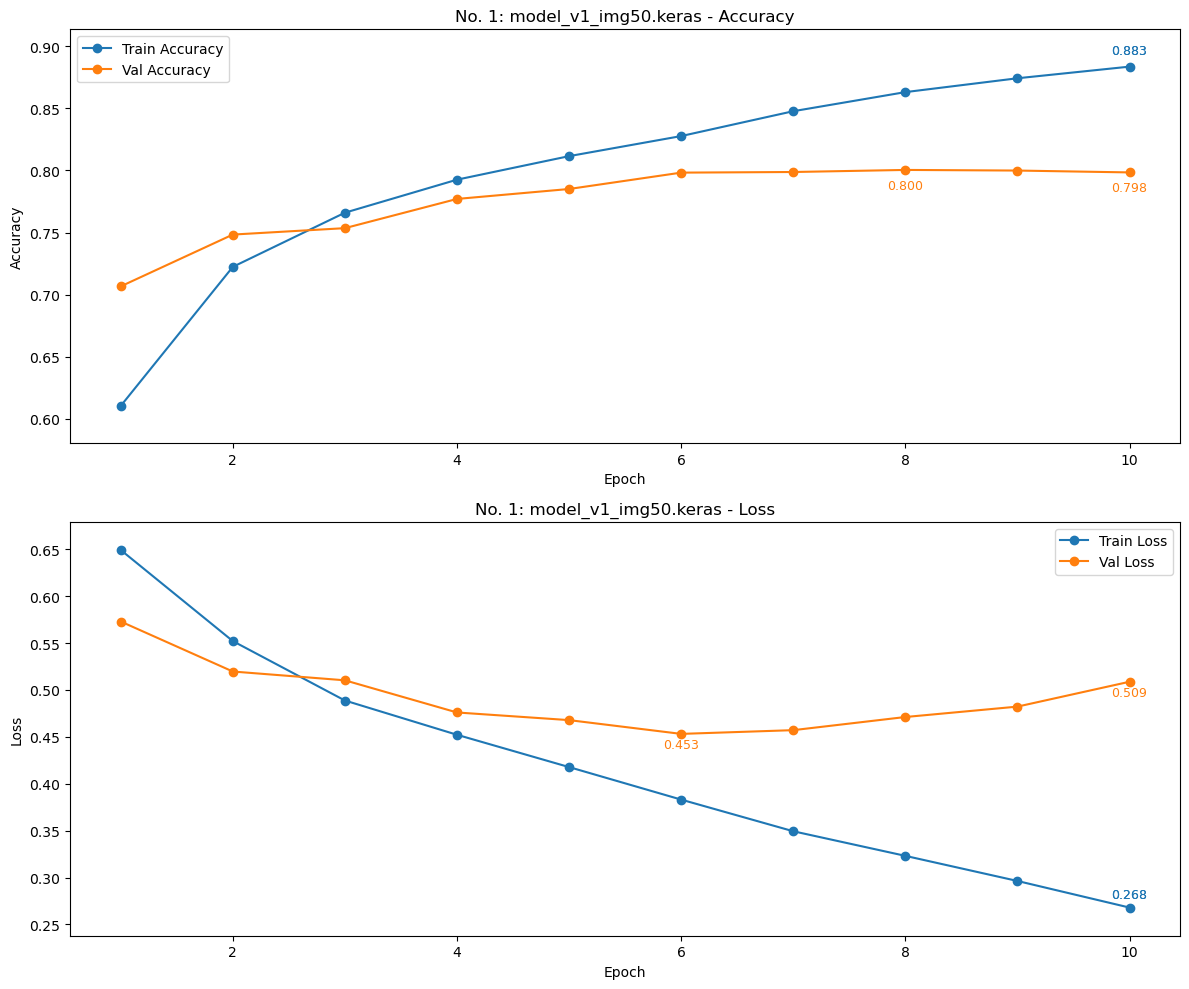

In [6]:
# Plot training accuracy and loss
plot_training_history(history = model_v1_img50_history, title = f"No. 1: {model_name}")

## Model No. 2: model_v1_img96
- Image size: 96x96
- Architecture: create_model_v1
- Epochs: 10

In [7]:
img_size_96 = (96, 96)
train_dataset_96, val_dataset_96 = load_train_val_ds(img_size_96, train_val_ds_dir, SEED, BATCH_SIZE, VAL_SPLIT)
train_dataset_96_norm = normalize_ds(train_dataset_96)
val_dataset_96_norm = normalize_ds(val_dataset_96)

Found 20000 files belonging to 2 classes.
Using 14000 files for training.
Found 20000 files belonging to 2 classes.
Using 6000 files for validation.


In [8]:
model_name = "model_v1_img96.keras"
history_name = "model_v1_img96_history.pkl"
model_v1_img96, model_v1_img96_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_96_norm,
    val_data=val_dataset_96_norm,
    img_size=img_size_96,
    create_model_fn=create_model_v1,
    epochs = 10
)

Model already exists, loading it.



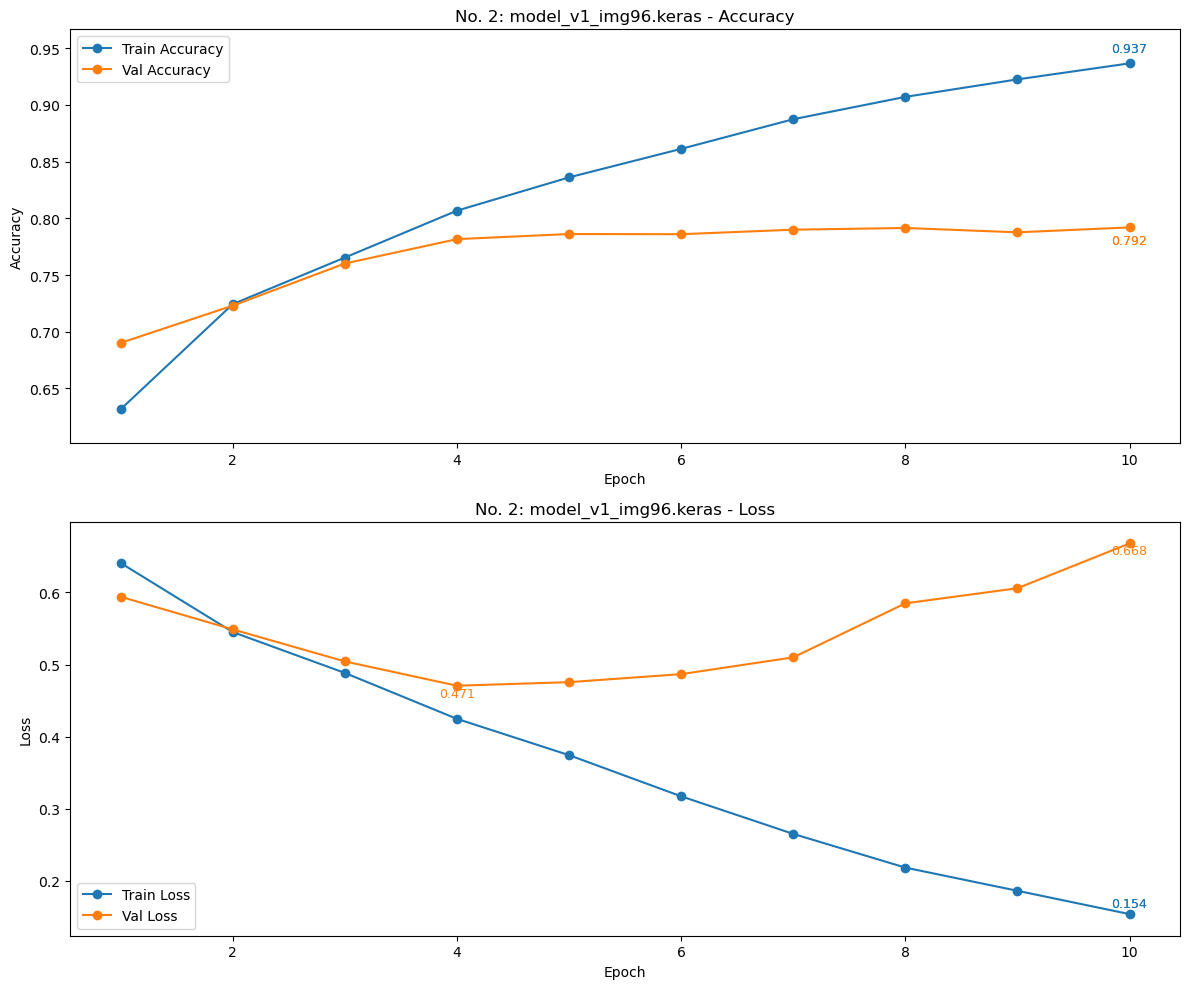

In [9]:
plot_training_history(history = model_v1_img96_history, title = f"No. 2: {model_name}")

In [10]:
data_augmentation_v1 = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

### Model No. 3: model_v1_img50_augv1
- Image size: 50x50
- Architecture: create_model_v1
- Augmentation: data_augmentation_v1
- Epochs: 10

In [11]:
train_dataset_50_augv1 = augment_ds(train_dataset_50, data_augmentation_v1)
train_dataset_50_augv1_norm = normalize_ds(train_dataset_50_augv1)

In [12]:
# Train Model with Augmentation v1
model_name = "model_v1_img50_augv1.keras"
history_name = "model_v1_img50_augv1_history.pkl"

model_v1_img50_augv1, model_v1_img50_augv1_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_50_augv1_norm,
    val_data=val_dataset_50_norm,
    img_size=img_size_50,
    create_model_fn=create_model_v1,
    epochs = 10
)

Model already exists, loading it.



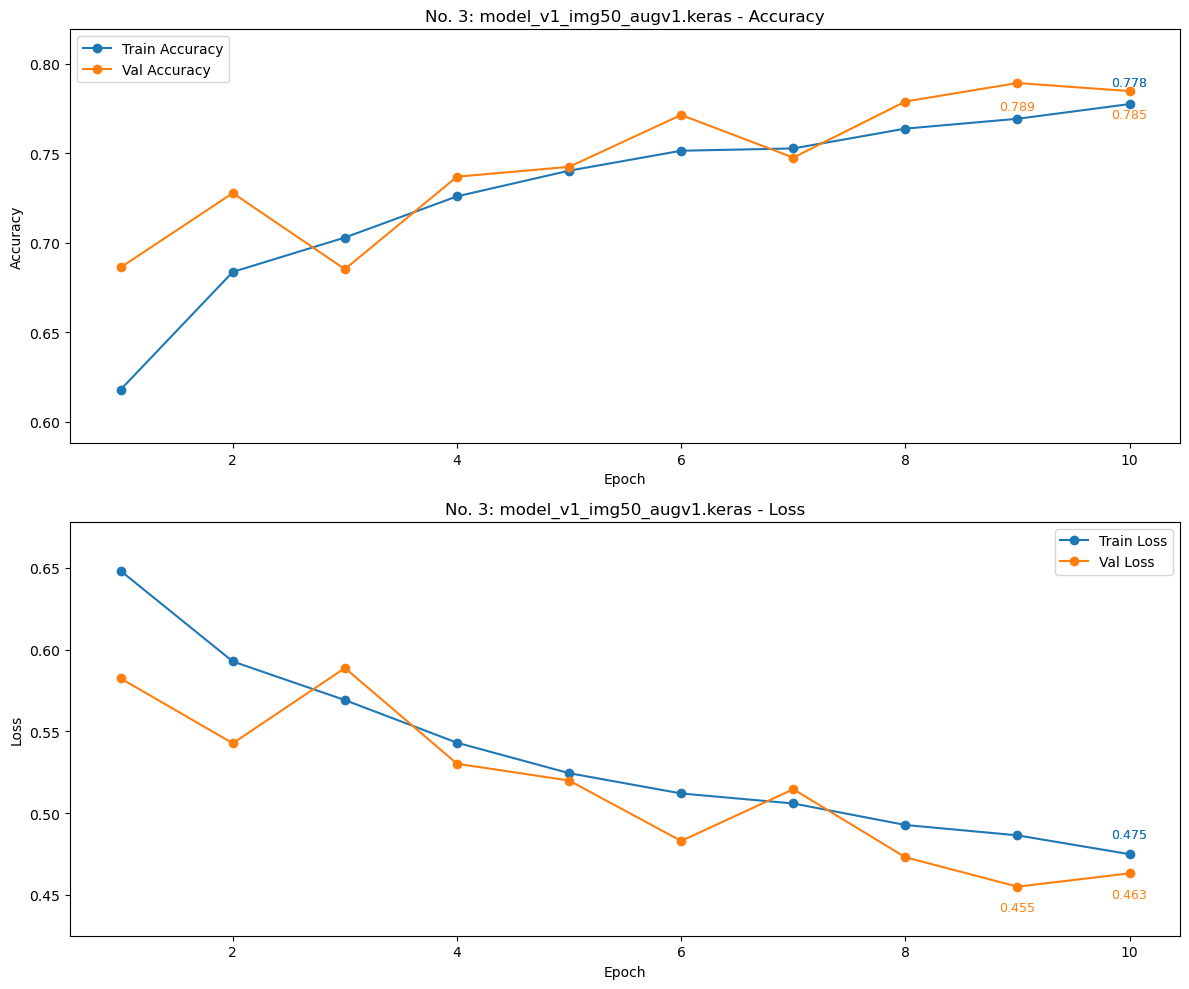

In [13]:
plot_training_history(history = model_v1_img50_augv1_history, title = f"No. 3: {model_name}")

### Model No. 4: model_v1_img96_augv1
- Image size: 96x96
- Architecture: create_model_v1
- Augmentation: data_augmentation_v1
- Epochs: 10

In [14]:
train_dataset_96_augv1 = augment_ds(train_dataset_96, data_augmentation_v1)
train_dataset_96_augv1_norm = normalize_ds(train_dataset_96_augv1)

In [15]:
model_name = "model_v1_img96_augv1.keras"
history_name = "model_v1_img96_augv1_history.pkl"

model_v1_img96_augv1, model_v1_img96_augv1_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_96_augv1_norm,
    val_data=val_dataset_96_norm,
    img_size=img_size_96,
    create_model_fn=create_model_v1,
    epochs = 10
)

Model already exists, loading it.



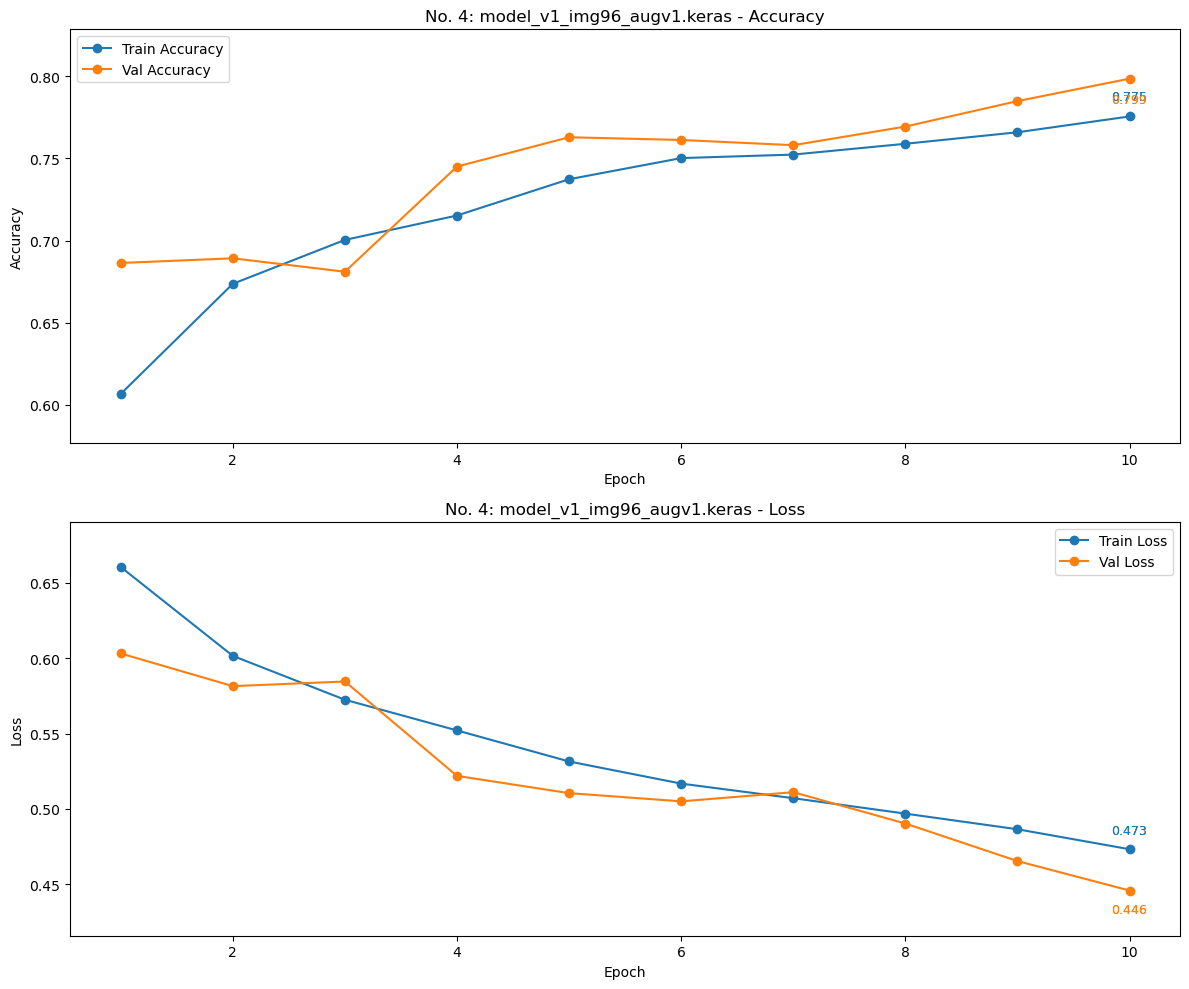

In [16]:
plot_training_history(history = model_v1_img96_augv1_history, title = f"No. 4: {model_name}")

### 🔍 Comparison: Models No. 1–4


| Model No.   | Model Name        | Input Size | Augmentation |Final Train Accuracy     | Final Val Accuracy |
|-------|-------------------------|------------|-------------------------|--------------|--------------------|
| No. 1 | model_v1_img50          | 50×50      |      ❌                 |   88.3%       |      79.8%        |
| No. 2 | model_v1_img96          | 96×96      |      ❌                 |   93.7%       |      79.2%        |
| No. 3 | model_v1_img50_augv1    | 50×50      |  data_augmentation_v1   |   77.8%       |      78.5%        |
| No. 4 | model_v1_img96_augv1    | 96×96      |  data_augmentation_v1   |   77.5%       |    **79.9%**      |

---

#### 📌 No. 1 vs No. 3 (`model_v1_img50` vs `model_v1_img50_augv1`)

- Applying augmentation to low-resolution images (50×50) reduced validation accuracy from 79.8% → 78.5%.
- This is likely because 50×50 resolution is too small, and augmentation further distorts the already limited features.

---

#### 📌 No. 2 vs No. 4 (`model_v1_img96` vs `model_v1_img96_augv1`)

- Validation accuracy increased slightly with augmentation (79.2% → 79.9%).
- The model seems to benefit from input variability at this resolution, suggesting that feature richness is sufficient for meaningful augmentation.

---

### Next Step

Among all four, Model No. 4 (`model_v1_img96_augv1`) shows the most promise:

- Highest validation accuracy despite lowest training accuracy — indicating less overfitting and better generalization.
- It likely underperformed in training because 10 epochs were insufficient for the augmented data to be fully learned.

Action:  
- Retrain Model No. 4 with 20 epochs.
- Add `EarlyStopping` to prevent unnecessary overfitting during the extended training.

This approach will help determine whether the current architecture simply needs more time to converge under augmented input.

In [17]:
# use EarlyStopping to automatically halt training when the validation performance stops improving.
early_stop_es3 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

### Model No. 5: model_v1_img96_augv1_e20_es3
- Image size: 96×96  
- Architecture: create_model_v1
- Augmentation: data_augmentation_v1  
- Epochs: 20  
- Callback: early_stop_es3

In [18]:
model_name = "model_v1_img96_augv1_e20_es3.keras"
history_name = "model_v1_img96_augv1_e20_es3_history.pkl"

model_v1_img96_augv1_e20_es3, model_v1_img96_augv1_e20_es3_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_96_augv1_norm,
    val_data=val_dataset_96_norm,
    img_size=img_size_96,
    create_model_fn=create_model_v1,
    epochs = 20,
    callbacks=early_stop_es3
)

Model already exists, loading it.



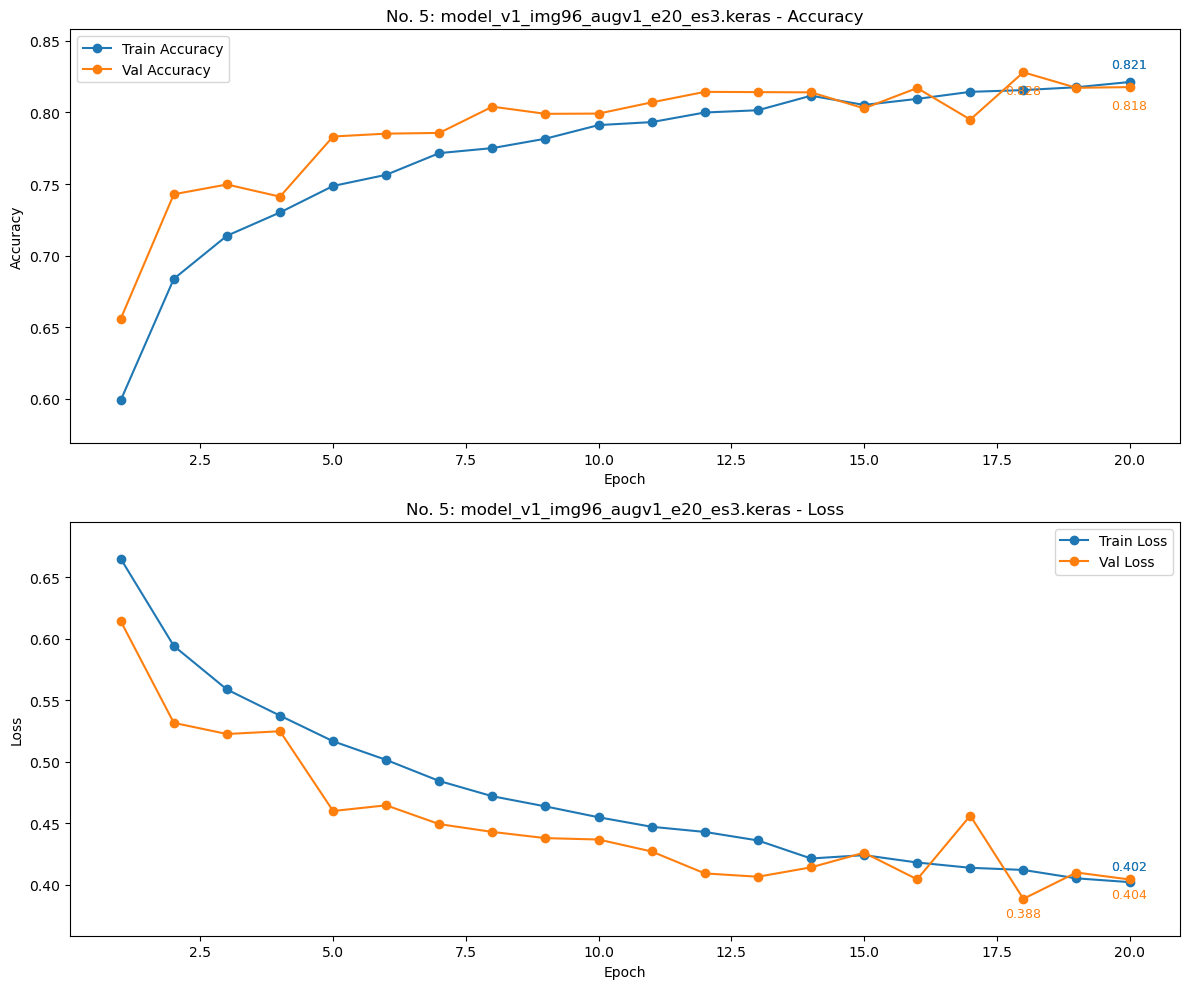

In [19]:
plot_training_history(history = model_v1_img96_augv1_e20_es3_history, title = f"No. 5: {model_name}")

### 🔎 Model No. 5 Summary: `model_v1_img96_augv1_e20_es3`

- **Validation Accuracy**: **81.8%**, which is an improvement over **Model No. 4** (79.9%).
- This confirms that extending training to 20 epochs with EarlyStopping (patience=3) allowed the model to better converge.
- The training remained stable throughout, with no signs of overfitting.
- The validation accuracy improved slightly and then plateaued, suggesting the model benefited from longer training, though its capacity might still limit further gains.

---

While Model No. 5 showed some improvement, the augmentation applied (`data_augmentation_v1`) may not have introduced sufficient variation to fully exploit the advantages of high-resolution inputs. To improve generalization, a more realistic and carefully tuned augmentation strategy (`data_augmentation_v2`) is proposed, intended to increase variability without distorting the images.

In [20]:
data_augmentation_v2 = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.1)
])

### Model No. 6: model_v1_img96_augv2_e20_es3
- Image size: 96×96  
- Architecture: create_model_v1  
- Augmentation: data_augmentation_v2 
- Epochs: 20
- Callback: early_stop_es3

In [21]:
train_dataset_96_augv2 = augment_ds(train_dataset_96, data_augmentation_v2)
train_dataset_96_augv2_norm = normalize_ds(train_dataset_96_augv2)

In [22]:
model_name = "model_v1_img96_augv2_e20_es3.keras"
history_name = "model_v1_img96_augv2_e20_es3_history.pkl"

model_v1_img96_augv2_e20_es3, model_v1_img96_augv2_e20_es3_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_96_augv2_norm,
    val_data=val_dataset_96_norm,
    img_size=img_size_96,
    create_model_fn=create_model_v1,
    epochs = 20,
    callbacks=early_stop_es3
)

Model already exists, loading it.



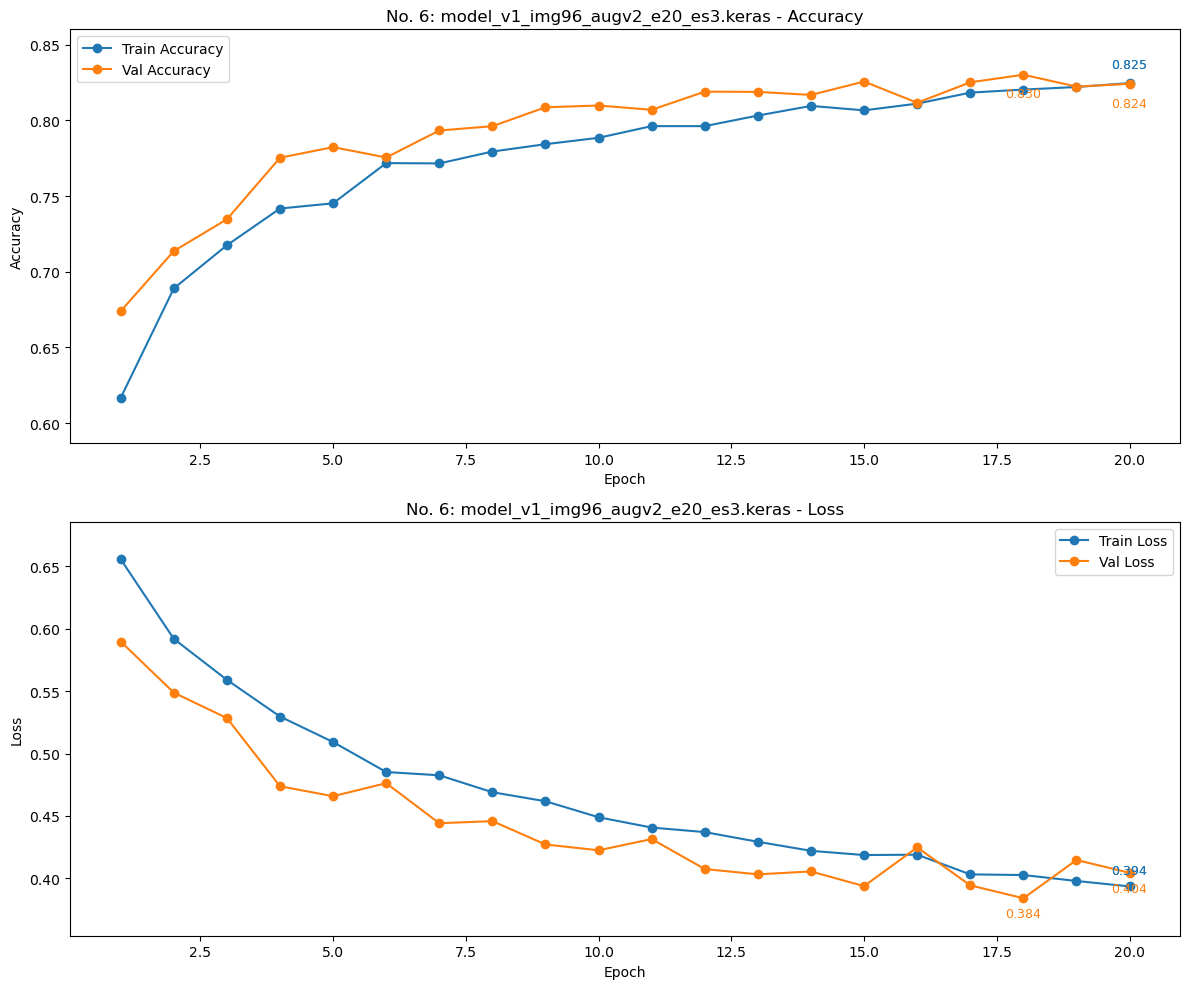

In [23]:
plot_training_history(history = model_v1_img96_augv2_e20_es3_history, title = f"No. 6: {model_name}")

### 🔍 Model Comparison: No. 5 vs No. 6

| Model No. | Model Name                     | Input Size | Augmentation           | Train Accuracy | Val Accuracy |
|-----------|--------------------------------|------------|------------------------|----------------|--------------|
| No. 5     | model_v1_img96_augv1_e20_es3   | 96×96      |  data_augmentation_v1  | 82.1%          |   81.8%      |
| No. 6     | model_v1_img96_augv2_e20_es3   | 96×96      |  data_augmentation_v2  | 82.5%          | **82.4%**    |

---

### ✅ Summary

- Model 6 outperformed Model 5, achieving the highest validation accuracy so far: **82.4%**.
- The improved results suggest that the enhanced augmentation pipeline (`data_augmentation_v2`) introduced richer, more realistic variability — without distorting the data.
- The tight alignment between train and validation accuracy indicates that the model is learning meaningful general patterns, not overfitting.

However, both models still rely on a relatively simple CNN architecture. This may limit their ability to fully capitalize on the complexity introduced by stronger augmentations.

---

### Next Step: Introducing `create_model_v2`

To unlock further improvements, the baseline architecture (`create_model_v1`) is replaced by a deeper and more expressive model: `create_model_v2`, featuring:

- Additional convolutional layers for deeper feature extraction
- BatchNormalization for stabilized and faster convergence
- GlobalAveragePooling2D to reduce overfitting and parameter count
- Lower learning rate (0.0003) for smoother convergence

---

This architecture is designed to better capture the complex patterns introduced by stronger augmentations — setting the stage for a new performance benchmark.

### Model No. 7: model_v2_img96_augv1_e20_es3
- Image size: 96×96
- Architecture: create_model_v2
- Augmentation: data_augmentation_v1
- Epochs: 20
- Callback: early_stop_es3

In [24]:
from model_creation import create_model_v2

model_name = "model_v2_img96_augv1_e20_es3.keras"
history_name = "model_v2_img96_augv1_e20_es3_history.pkl"

model_v2_img96_augv1_e20_es3, model_v2_img96_augv1_e20_es3_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_96_augv1_norm,
    val_data=val_dataset_96_norm,
    img_size=img_size_96,
    create_model_fn=create_model_v2,
    epochs = 20,
    callbacks=early_stop_es3
)

Model already exists, loading it.



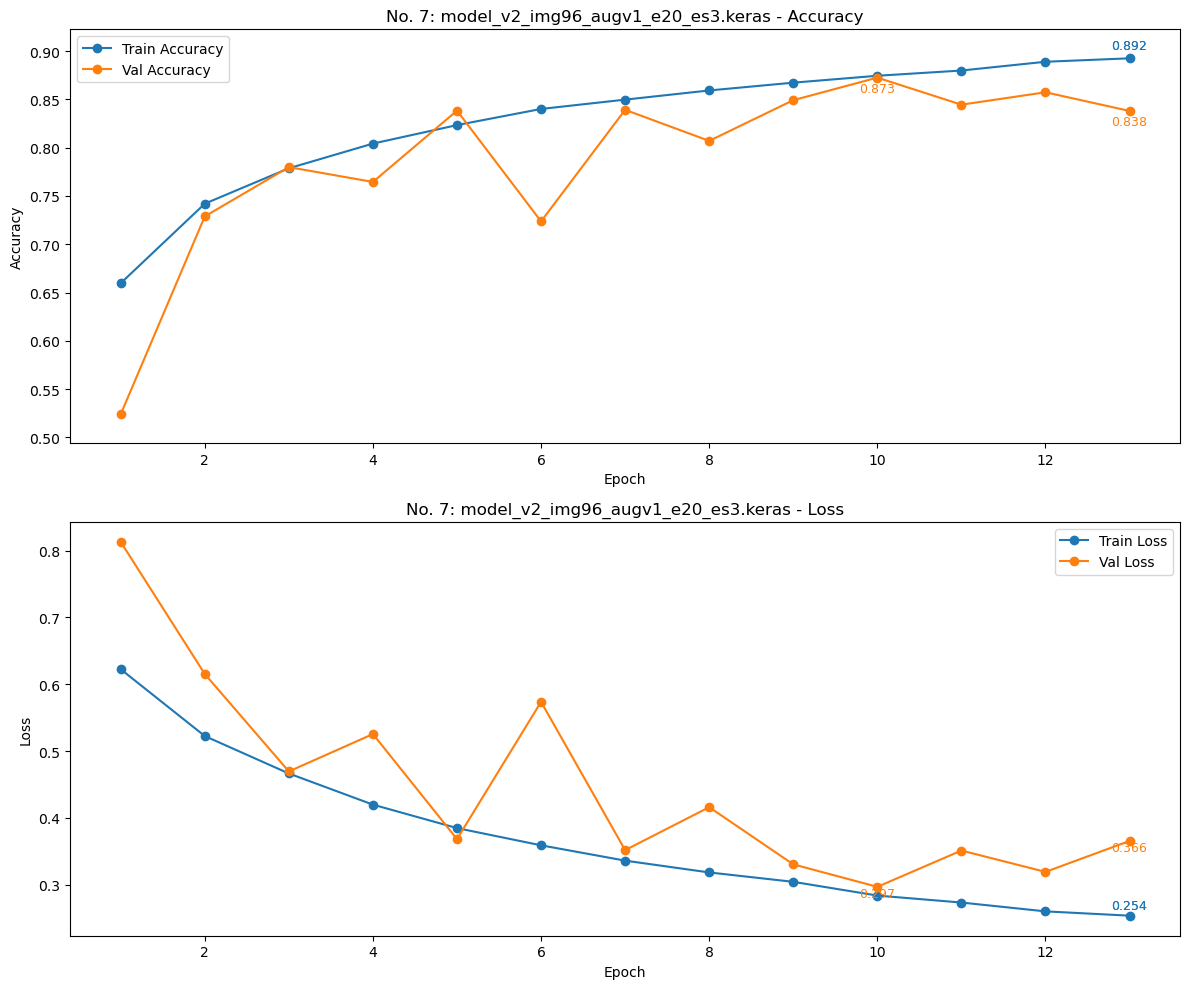

In [25]:
plot_training_history(history = model_v2_img96_augv1_e20_es3_history, title = f"No. 7: {model_name}")

### Model No. 8: model_v2_img96_augv2_e20_es3
- Image size: 96×96  
- Architecture: create_model_v2
- Augmentation: data_augmentation_v2 
- Epochs: 20  
- Callback: early_stop_es3

In [26]:
model_name = "model_v2_img96_augv2_e20_es3.keras"
history_name = "model_v2_img96_augv2_e20_es3_history.pkl"

model_v2_img96_augv2_e20_es3, model_v2_img96_augv2_e20_es3_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_96_augv2_norm,
    val_data=val_dataset_96_norm,
    img_size=img_size_96,
    create_model_fn=create_model_v2,
    epochs = 20,
    callbacks=early_stop_es3
)

Model already exists, loading it.



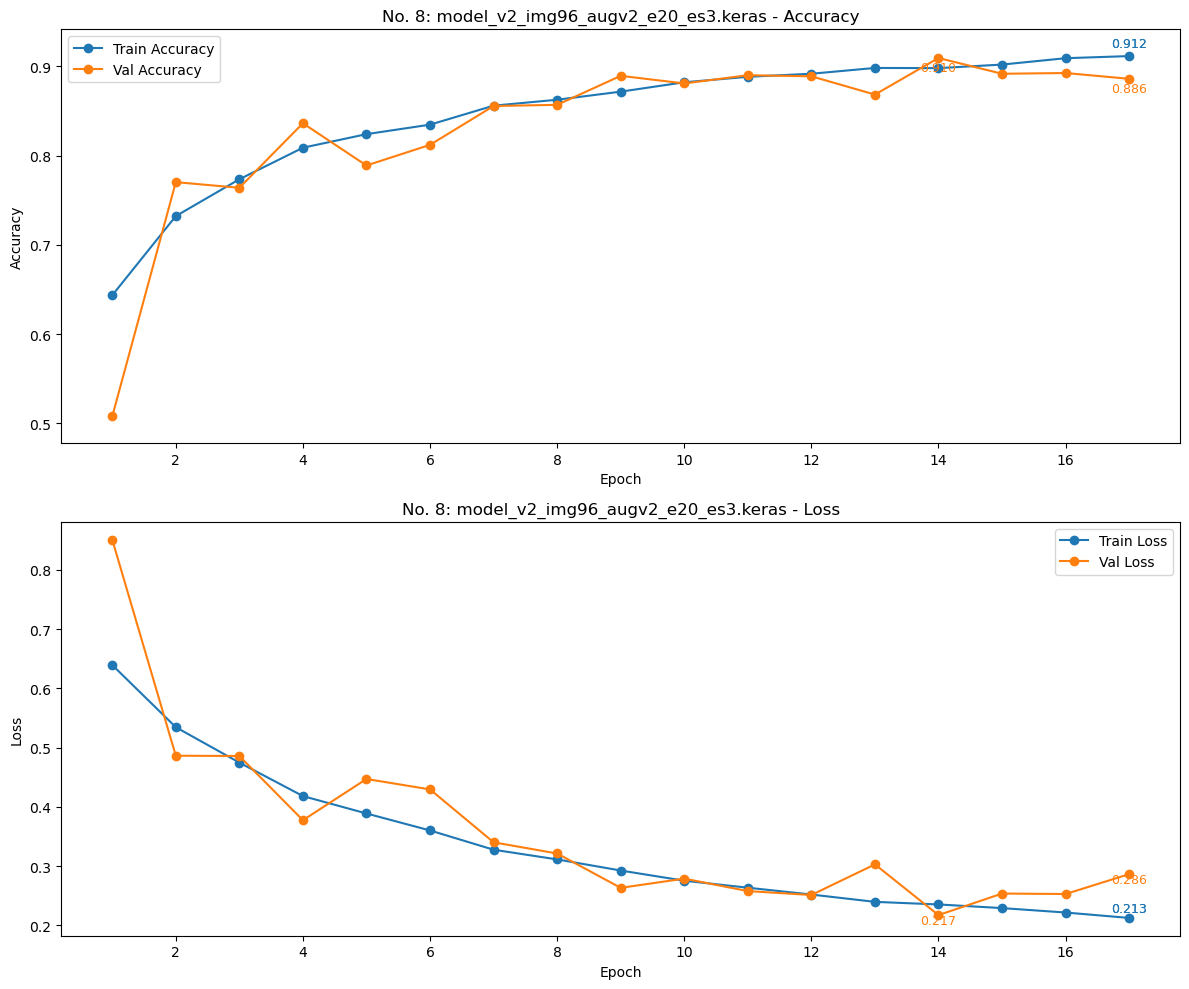

In [27]:
plot_training_history(history = model_v2_img96_augv2_e20_es3_history, title = f"No. 8: {model_name}")

### 🔍 Comparison: Model No. 7 vs Model No. 8

| Model No. | Model Name                    | Input Size | Augmentation         | Final Train Accuracy  | Final Val Accuracy |
|-----------|-------------------------------|------------|----------------------|-----------------------|--------------------|
| No. 7     | model_v2_img96_augv1_e20_es3  | 96×96      | data_augmentation_v1 |   89.2%               |     83.8%          |
| No. 8     | model_v2_img96_augv2_e20_es3  | 96×96      | data_augmentation_v2 |   91.2%               |   **88.6%**        |

---

### ✅ Summary

Both models were trained using the deeper architecture `create_model_v2`, which includes BatchNormalization and GlobalAveragePooling for better generalization.  
Model No. 8 significantly outperformed Model No. 7 in both training and validation accuracy, confirming that `data_augmentation_v2` introduced more effective variation during training.

The jump from 83.8% to 88.6% in validation accuracy is especially notable and suggests the model is benefiting from both the improved augmentation and the deeper architecture.

---

### Next Step

Model No. 8 demonstrates strong learning potential. To further explore its performance ceiling:

- Increase training epochs to 25
- Use `EarlyStopping(patience=8)` to allow for deeper convergence without overfitting

This setup is expected to yield even better generalization by allowing the model more time to refine its learning.

In [28]:
# For complex or deeper models
early_stop_es8 = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

### Model No. 9: model_v2_img96_augv1_e25_es8
- Image size: 96×96
- Architecture: create_model_v2
- Augmentation: data_augmentation_v1
- Epochs: 25
- Callback: early_stop_es8

In [29]:
model_name = "model_v2_img96_augv1_e25_es8.keras"
history_name = "model_v2_img96_augv1_e25_es8_history.pkl"

model_v2_img96_augv1_e25_es8, model_v2_img96_augv1_e25_es8_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_96_augv1_norm,
    val_data=val_dataset_96_norm,
    img_size=img_size_96,
    create_model_fn=create_model_v2,
    epochs = 25,
    callbacks=early_stop_es8
)

Model already exists, loading it.



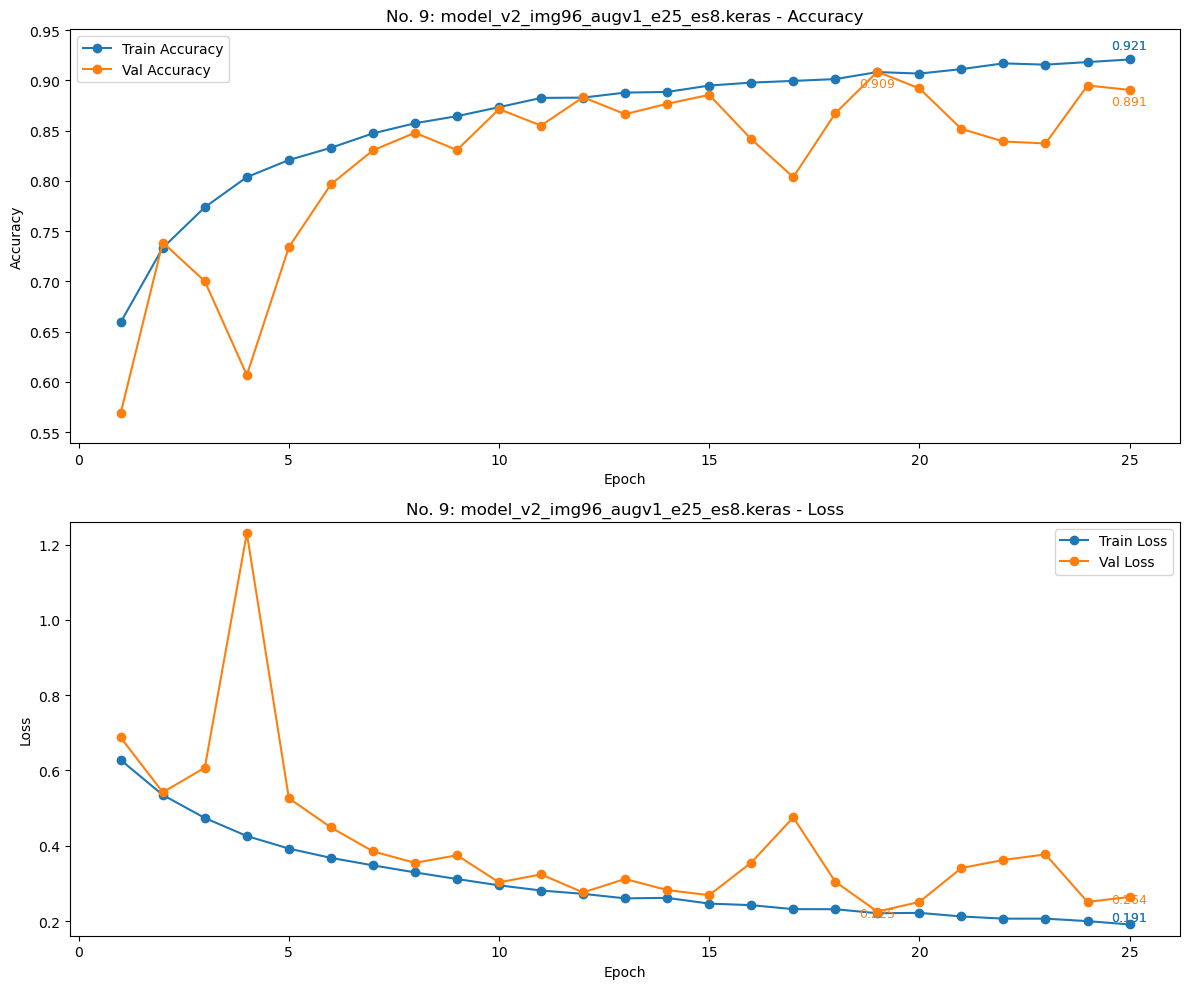

In [30]:
plot_training_history(history = model_v2_img96_augv1_e25_es8_history, title = f"No. 9: {model_name}")

### Model No. 10: model_v2_img96_augv2_e25_es8
- Image size: 96×96  
- Architecture: create_model_v2
- Augmentation: data_augmentation_v2 
- Epochs: 25
- Callback: early_stop_es8

In [31]:
model_name = "model_v2_img96_augv2_e25_es8.keras"
history_name = "model_v2_img96_augv2_e25_es8_history.pkl"

model_v2_img96_augv2_e25_es8, model_v2_img96_augv2_e25_es8_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_96_augv2_norm,
    val_data=val_dataset_96_norm,
    img_size=img_size_96,
    create_model_fn=create_model_v2,
    epochs = 25,
    callbacks=early_stop_es8
)

Model already exists, loading it.



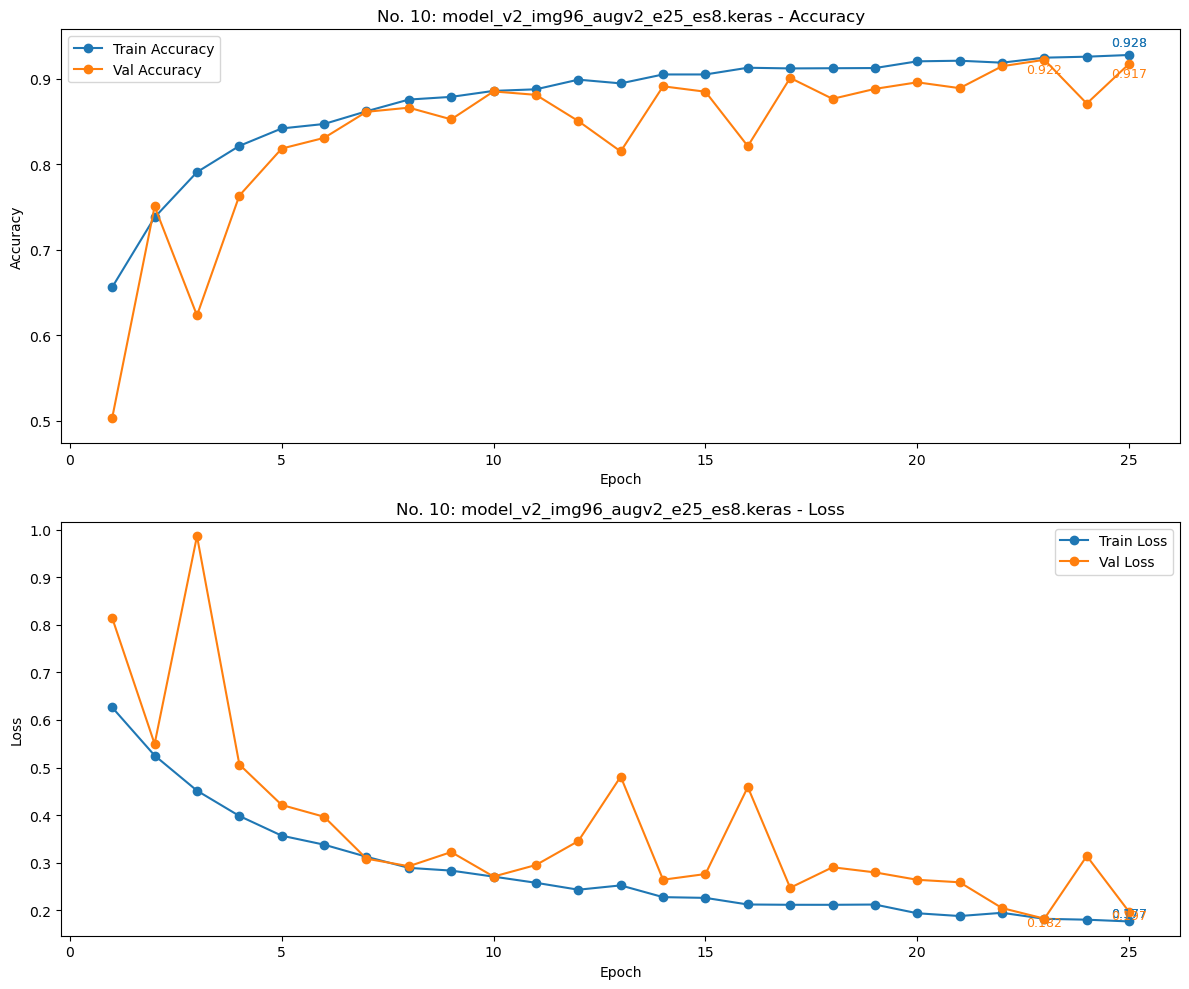

In [32]:
plot_training_history(history = model_v2_img96_augv2_e25_es8_history, title = f"No. 10: {model_name}")

### 🔍 Comparison: Model No. 9 vs Model No. 10

| Model No. | Model Name                   | Input Size | Augmentation         | Final Train Accuracy  | Final Val Accuracy |
|-----------|------------------------------|------------|----------------------|-----------------------|--------------------|
| No. 9     | model_v2_img96_augv1_e25_es8 | 96×96      | data_augmentation_v1 |   92.1%               |   89.1%            |
| No. 10    | model_v2_img96_augv2_e25_es8 | 96×96      | data_augmentation_v2 |   92.8%               | **91.7%**          |

---

### ✅ Summary

Model No. 10 outperformed Model No. 9 in both training and validation accuracy, achieving the highest validation accuracy so far at **91.7%**.  
This indicates that the combination of the deeper architecture (`create_model_v2`), extended training (25 epochs), and the refined augmentation strategy (`data_augmentation_v2`) has successfully enhanced both learning and generalization.

The use of `EarlyStopping` with a patience of 8 ensured the training ran long enough to converge, without overfitting.  
Training and validation accuracies are closely aligned in model No. 10, showing stable learning dynamics.

---

### Next Step: Introducing `create_model_v3`

To build upon the success of Model No. 10, the next stage will introduce a more advanced architecture, `create_model_v3`, alongside higher-resolution input images.

This new model incorporates a residual-style skip connection and additional convolutional depth, designed to enhance feature reuse and gradient flow. The increased input size of 160×160 will enable the model to capture finer visual patterns, which the current resolution may not fully resolve.

The model will be trained for up to 30 epochs, using EarlyStopping with a patience of 8 to ensure sufficient convergence without overfitting.

This setup is intended to assess whether the combination of greater model capacity and higher-resolution input can further improve validation performance beyond the current best result of 91.7%.

---

### Model No. 11: model_v3_img160_augv1_e30_es8
- Image size: 160×160
- Architecture: create_model_v3
- Augmentation: data_augmentation_v1
- Epochs: 30
- Callback: early_stop_es8

In [33]:
img_size_160 = (160, 160)
train_dataset_160, val_dataset_160 = load_train_val_ds(img_size_160, train_val_ds_dir, SEED, BATCH_SIZE, VAL_SPLIT)
train_dataset_160_augv1 = augment_ds(train_dataset_160, data_augmentation_v1)
train_dataset_160_augv1_norm = normalize_ds(train_dataset_160_augv1)
val_dataset_160_norm = normalize_ds(val_dataset_160)

Found 20000 files belonging to 2 classes.
Using 14000 files for training.
Found 20000 files belonging to 2 classes.
Using 6000 files for validation.


In [34]:
from model_creation import create_model_v3

model_name = "model_v3_img160_augv1_e30_es8.keras"
history_name = "model_v3_img160_augv1_e30_es8_history.pkl"

model_v3_img160_augv1_e30_es8, model_v3_img160_augv1_e30_es8_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_160_augv1_norm,
    val_data=val_dataset_160_norm,
    img_size=img_size_160,
    create_model_fn=create_model_v3,
    epochs = 30,
    callbacks=early_stop_es8
)

Model already exists, loading it.



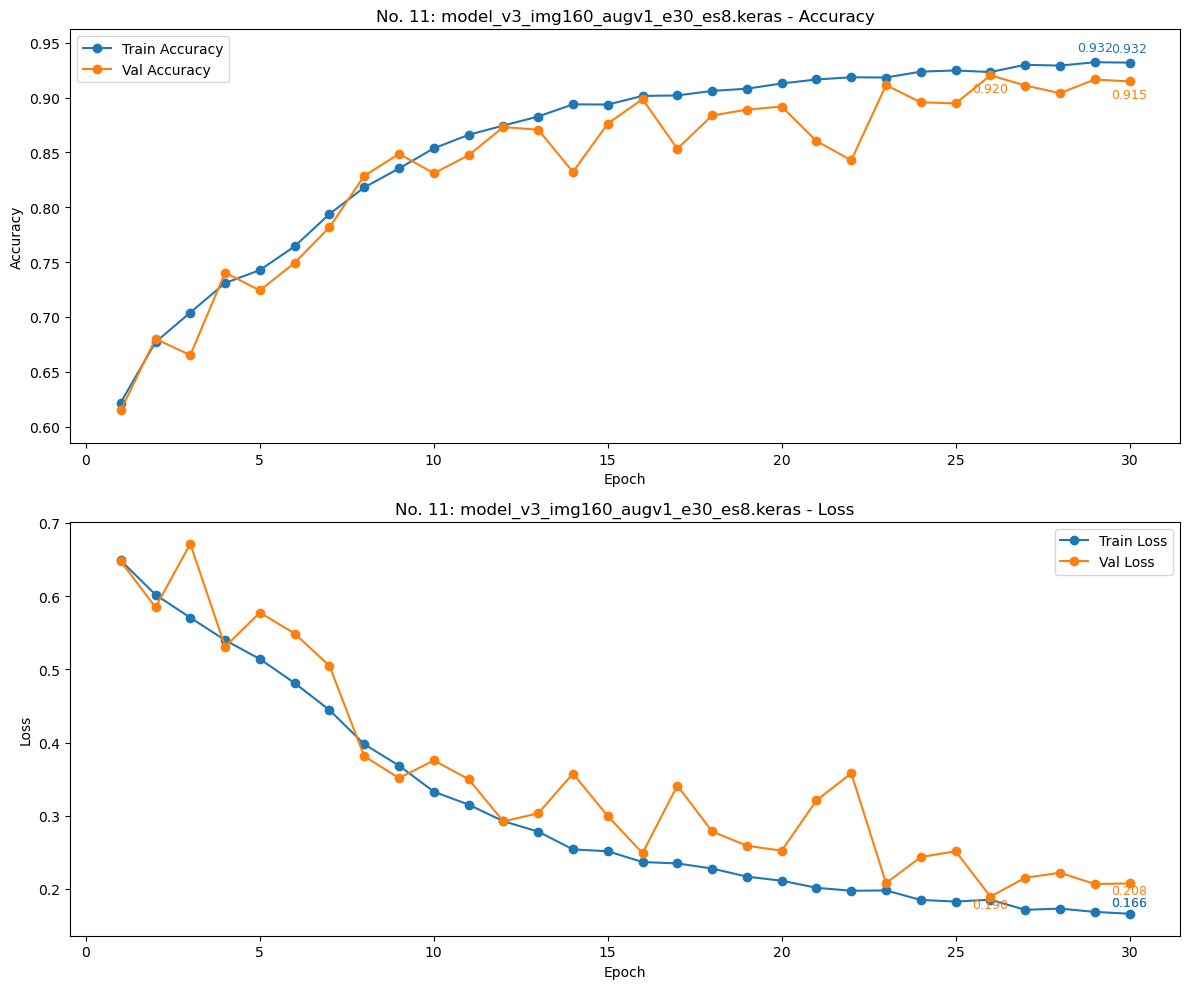

In [35]:
plot_training_history(history = model_v3_img160_augv1_e30_es8_history, title = f"No. 11: {model_name}")

### Model No. 12: model_v3_img160_augv2_e30_es8
- Image size: 160×160
- Architecture: create_model_v3
- Augmentation: data_augmentation_v2
- Epochs: 30
- Callback: early_stop_es8

In [36]:
train_dataset_160_augv2 = augment_ds(train_dataset_160, data_augmentation_v2)
train_dataset_160_augv2_norm = normalize_ds(train_dataset_160_augv2)

In [37]:
model_name = "model_v3_img160_augv2_e30_es8.keras"
history_name = "model_v3_img160_augv2_e30_es8_history.pkl"

model_v3_img160_augv2_e30_es8, model_v3_img160_augv2_e30_es8_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_160_augv2_norm,
    val_data=val_dataset_160_norm,
    img_size=img_size_160,
    create_model_fn=create_model_v3,
    epochs = 30,
    callbacks=early_stop_es8
)

Model already exists, loading it.



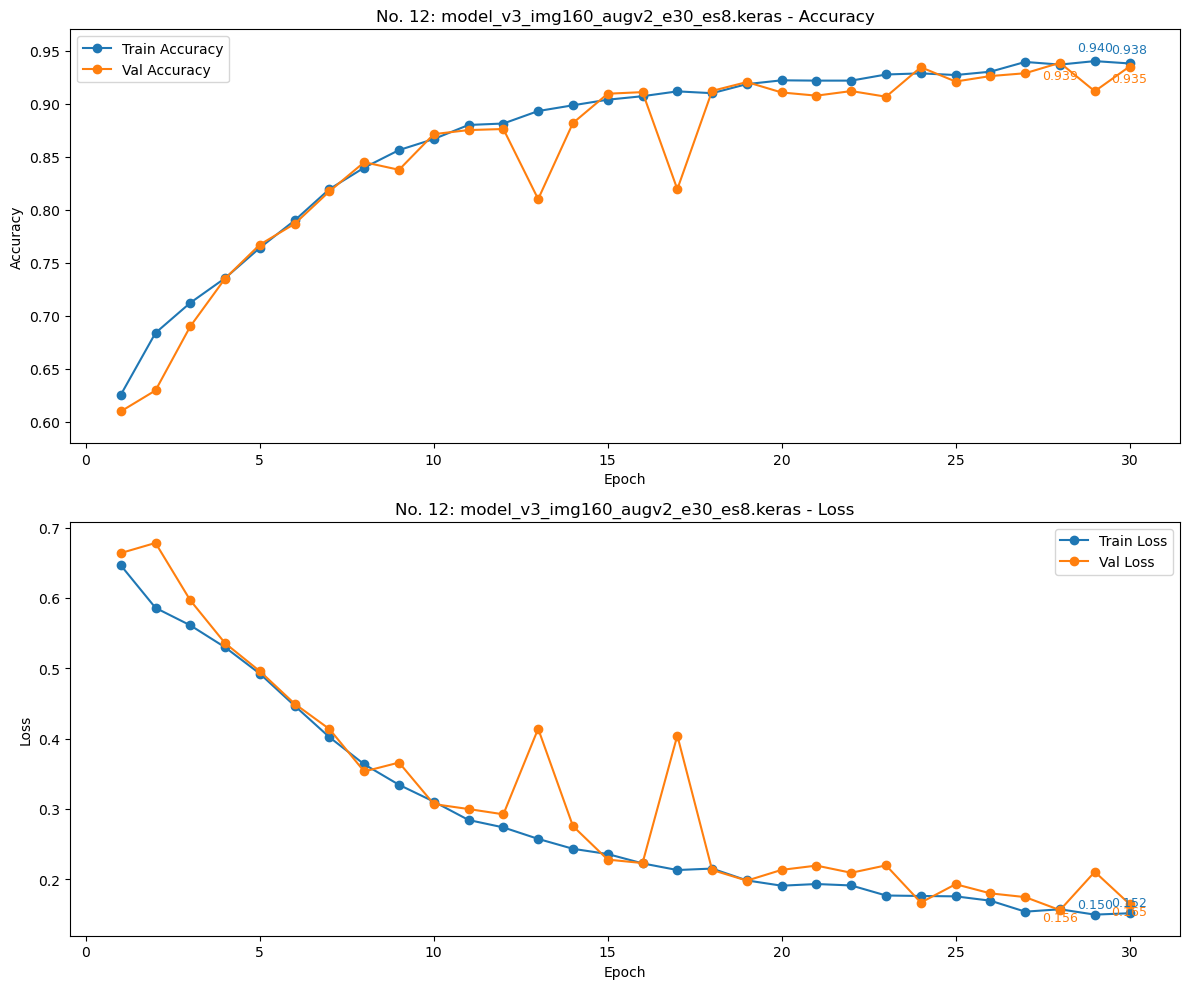

In [38]:
plot_training_history(history = model_v3_img160_augv2_e30_es8_history, title = f"No. 12: {model_name}")

### 🔍 Comparison: Model No. 11 vs Model No. 12

| Model No. | Model Name                    | Input Size | Augmentation         | Final Train Accuracy | Final Val Accuracy |
|-----------|-------------------------------|------------|----------------------|-----------------------|-------------------|
| No. 11    | model_v3_img160_augv1_e30_es8 |  160×160   | data_augmentation_v1 |     93.2%             |       91.5%       |
| No. 12    | model_v3_img160_augv2_e30_es8 |  160×160   | data_augmentation_v2 |     93.8%             |     **93.5%**     |

---

### ✅ Summary

Model No. 12 achieved the highest validation accuracy to date: **93.5%**, surpassing both Model No. 11 and all previous experiments.  
This improvement is attributed to:

- Higher-resolution input (160×160)
- A deeper architecture with a residual-like connection (create_model_v3)
- A more refined augmentation strategy (data_augmentation_v2)

Both models maintained high training accuracy (over 93%), but Model No. 12 demonstrated better generalization, outperforming Model No. 11 by 2.0% on validation accuracy.

---

### Final Step: Model No. 13 and Model No. 14

Building on the success of Model No. 12, two final models will be introduced with further improvements:

| Model No. | Model Name                       | Input Size | Augmentation           | Epochs | Callback          |
|-----------|----------------------------------|------------|------------------------|--------|-------------------|
| No. 13    |  model_v3_img224_augv2_e40_es10  | 224×224    |  data_augmentation_v2  | 40     |  early_stop_es10  |
| No. 14    |  model_v3_img256_augv2_e45_es12  | 256×256    |  data_augmentation_v2  | 45     |  early_stop_es12  |

These models apply:
- Higher image resolutions (224×224 and 256×256) to preserve more fine-grained details
- The robust `create_model_v3` architecture
- Carefully tuned `EarlyStopping` to prevent overfitting during longer training

---

### Dataset Loading

From this stage onward, the training and evaluation pipelines follow deployment-oriented workflows to ensure consistency and fair comparison across models:

- `load_train_val_ds()` is used to load the training and validation datasets  
- `load_test_ds()` is used to load the dedicated test set
- Each dataset is resized to match the input resolution of the corresponding model

> The test set remains strictly unseen until final evaluation — ensuring a fair and unbiased assessment of generalization performance.


In [39]:
early_stop_es10 = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

### Model No. 13: model_v3_img224_augv2_e40_es10
- Image size: 224×224
- Architecture: create_model_v3
- Augmentation: data_augmentation_v2
- Epochs: 40
- Callback: early_stop_es10

In [40]:
# Load training and validation datasets
img_size_224 = (224, 224)
train_dataset_224, val_dataset_224 = load_train_val_ds(img_size_224, train_val_ds_dir, SEED, BATCH_SIZE, VAL_SPLIT)
train_dataset_224_augv2 = augment_ds(train_dataset_224, data_augmentation_v2)
train_dataset_224_augv2_norm = normalize_ds(train_dataset_224_augv2)
val_dataset_224_norm = normalize_ds(val_dataset_224)

# Load test dataset (must match the same input size used for training)
test_dataset_224 = load_test_ds(img_size_224, test_ds_dir, BATCH_SIZE)
test_dataset_224_norm = normalize_ds(test_dataset_224)

Found 20000 files belonging to 2 classes.
Using 14000 files for training.
Found 20000 files belonging to 2 classes.
Using 6000 files for validation.
Found 5000 files belonging to 2 classes.


In [41]:
model_name = "model_v3_img224_augv2_e40_es10.keras"
history_name = "model_v3_img224_augv2_e40_es10_history.pkl"

model_v3_img224_augv2_e40_es10, model_v3_img224_augv2_e40_es10_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_224_augv2_norm,
    val_data=val_dataset_224_norm,
    img_size=img_size_224,
    create_model_fn=create_model_v3,
    epochs=40,
    callbacks=early_stop_es10
)

Model already exists, loading it.



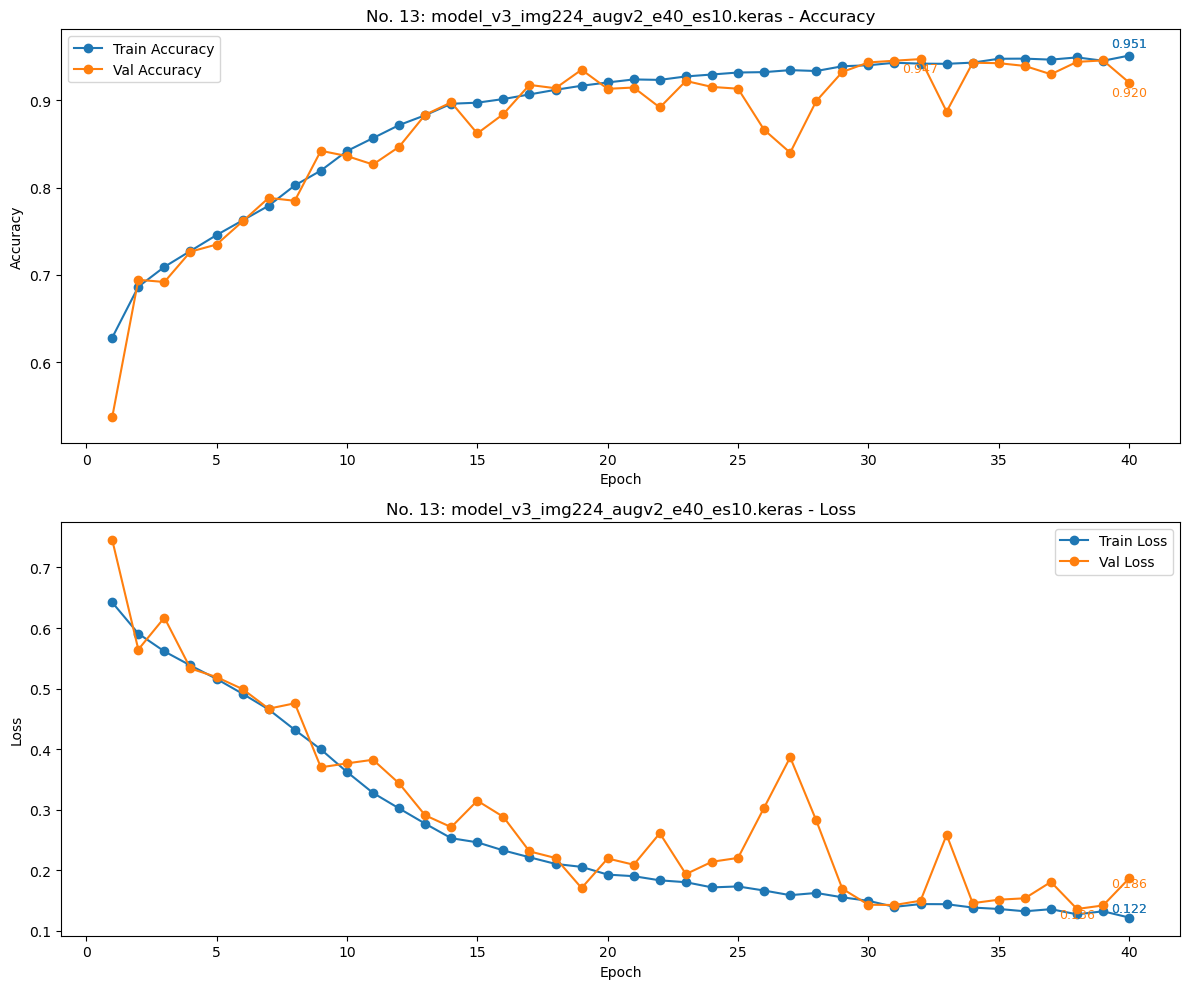

In [42]:
plot_training_history(history = model_v3_img224_augv2_e40_es10_history, title = f"No. 13: {model_name}")

In [43]:
early_stop_es12 = EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True
)

### Model No. 14: model_v3_img256_augv2_e45_es12
- Image size: 256×256
- Architecture: create_model_v3
- Augmentation: data_augmentation_v2
- Epochs: 45
- Callback: early_stop_es12

In [44]:
# load training and validation dataset
img_size_256 = (256, 256)
train_dataset_256, val_dataset_256 = load_train_val_ds(img_size_256, train_val_ds_dir, SEED, BATCH_SIZE, VAL_SPLIT)
train_dataset_256_augv2 = augment_ds(train_dataset_256, data_augmentation_v2)
train_dataset_256_augv2_norm = normalize_ds(train_dataset_256_augv2)
val_dataset_256_norm = normalize_ds(val_dataset_256)

# Load test dataset (must match the same input size used for training)
test_dataset_256 = load_test_ds(img_size_256, test_ds_dir, BATCH_SIZE)
test_dataset_256_norm = normalize_ds(test_dataset_256)

Found 20000 files belonging to 2 classes.
Using 14000 files for training.
Found 20000 files belonging to 2 classes.
Using 6000 files for validation.
Found 5000 files belonging to 2 classes.


In [45]:
model_name = "model_v3_img256_augv2_e45_es12.keras"
history_name = "model_v3_img256_augv2_e45_es12_history.pkl"

model_v3_img256_augv2_e45_es12, model_v3_img256_augv2_e45_es12_history = get_model_and_history(
    model_dir=model_dir,
    model_name=model_name,
    history_name=history_name,
    train_data=train_dataset_256_augv2_norm,
    val_data=val_dataset_256_norm,
    img_size=img_size_256,
    create_model_fn=create_model_v3,
    epochs=45,
    callbacks=early_stop_es12
)

Model already exists, loading it.



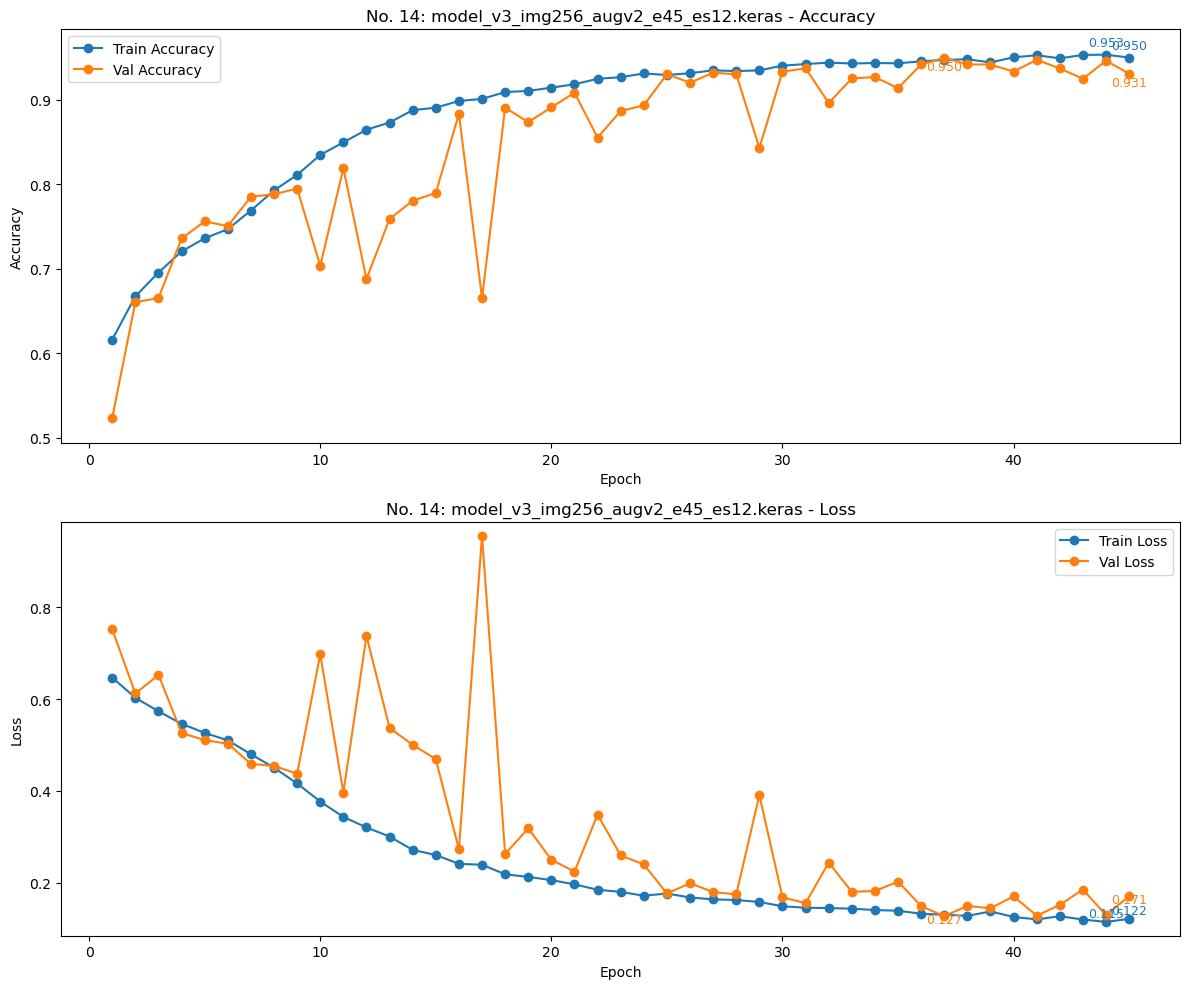

In [46]:
plot_training_history(history = model_v3_img256_augv2_e45_es12_history, title = f"No. 14: {model_name}")

### 🔍 Comparison: Model No. 13 vs Model No. 14

| Model No. | Model Name                     | Input Size | Augmentation         | Final Train Accuracy  | Final Val Accuracy  |
|-----------|--------------------------------|------------|----------------------|-----------------------|---------------------|
| No. 13    | model_v3_img224_augv2_e40_es10 | 224×224    | data_augmentation_v2 |     95.1%             |     92.0%           |
| No. 14    | model_v3_img256_augv2_e45_es12 | 256×256    | data_augmentation_v2 |     95.0%             |   **93.1%**         |

---

### ✅ Summary

Model No. 14 achieved the highest validation accuracy to date: **93.1%**, outperforming Model No. 13 (92.0%).  
This improvement highlights the benefit of increasing the input resolution to 256×256, allowing the model to capture more fine-grained visual features and textures.

Training remained stable, and no overfitting was observed — both training and validation accuracies were well-aligned.  
Since both models used the same architecture (`create_model_v3`) and augmentation strategy (`data_augmentation_v2`), the 1.1% gain in validation accuracy can be attributed primarily to the larger input size and extended training.

---

### Next Step: Final Evaluation

- Evaluate Model No. 13 on the test set using `test_dataset_224_norm`
- Evaluate Model No. 14 on the test set using `test_dataset_256_norm`
- Report the following metrics:
  - Precision
  - F1-score
  - Confusion Matrix
- Additionally, display a few visual predictions for qualitative assessment

In [47]:
# Class labels used for binary classification: 0 = Cat, 1 = Dog
class_names = ["Cat", "Dog"]

I0000 00:00:1749830072.403888 3791494 service.cc:148] XLA service 0x6000070d5500 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749830072.404588 3791494 service.cc:156]   StreamExecutor device (0): Host, Default Version
2025-06-13 23:54:32.445798: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749830072.709971 3791494 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2025-06-13 23:55:37.888826: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


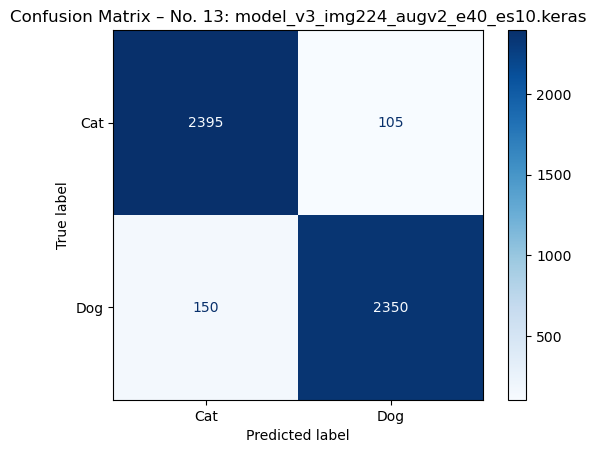

In [48]:
# load model to be tested
model_name = "model_v3_img224_augv2_e40_es10.keras"
model_v3_img224_augv2_e40_es10 = load_model(os.path.join(model_dir, model_name))

# Evaluate 
evaluate_model(
    model = model_v3_img224_augv2_e40_es10,
    test_ds = test_dataset_224_norm,
    class_names = class_names,
    model_name = f"No. 13: {model_name}"
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

2025-06-13 23:56:51.563284: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


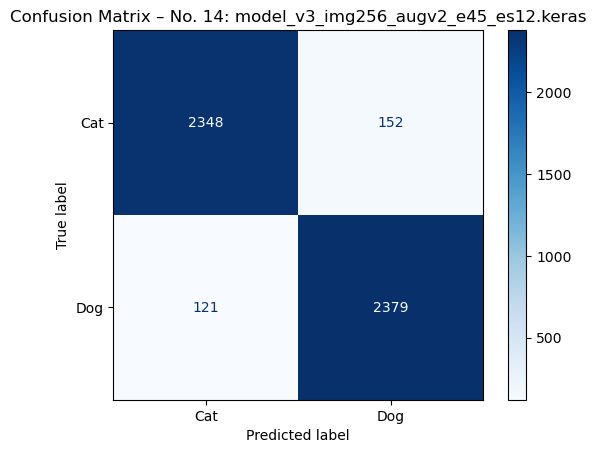

In [49]:
model_name = "model_v3_img256_augv2_e45_es12.keras"
model_v3_img256_augv2_e45_es12 = load_model(os.path.join(model_dir, "model_v3_img256_augv2_e45_es12.keras"))

# Evaluate 
evaluate_model(
    model = model_v3_img256_augv2_e45_es12,
    test_ds = test_dataset_256_norm,
    class_names = class_names,
    model_name = f"No. 14: {model_name}"
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


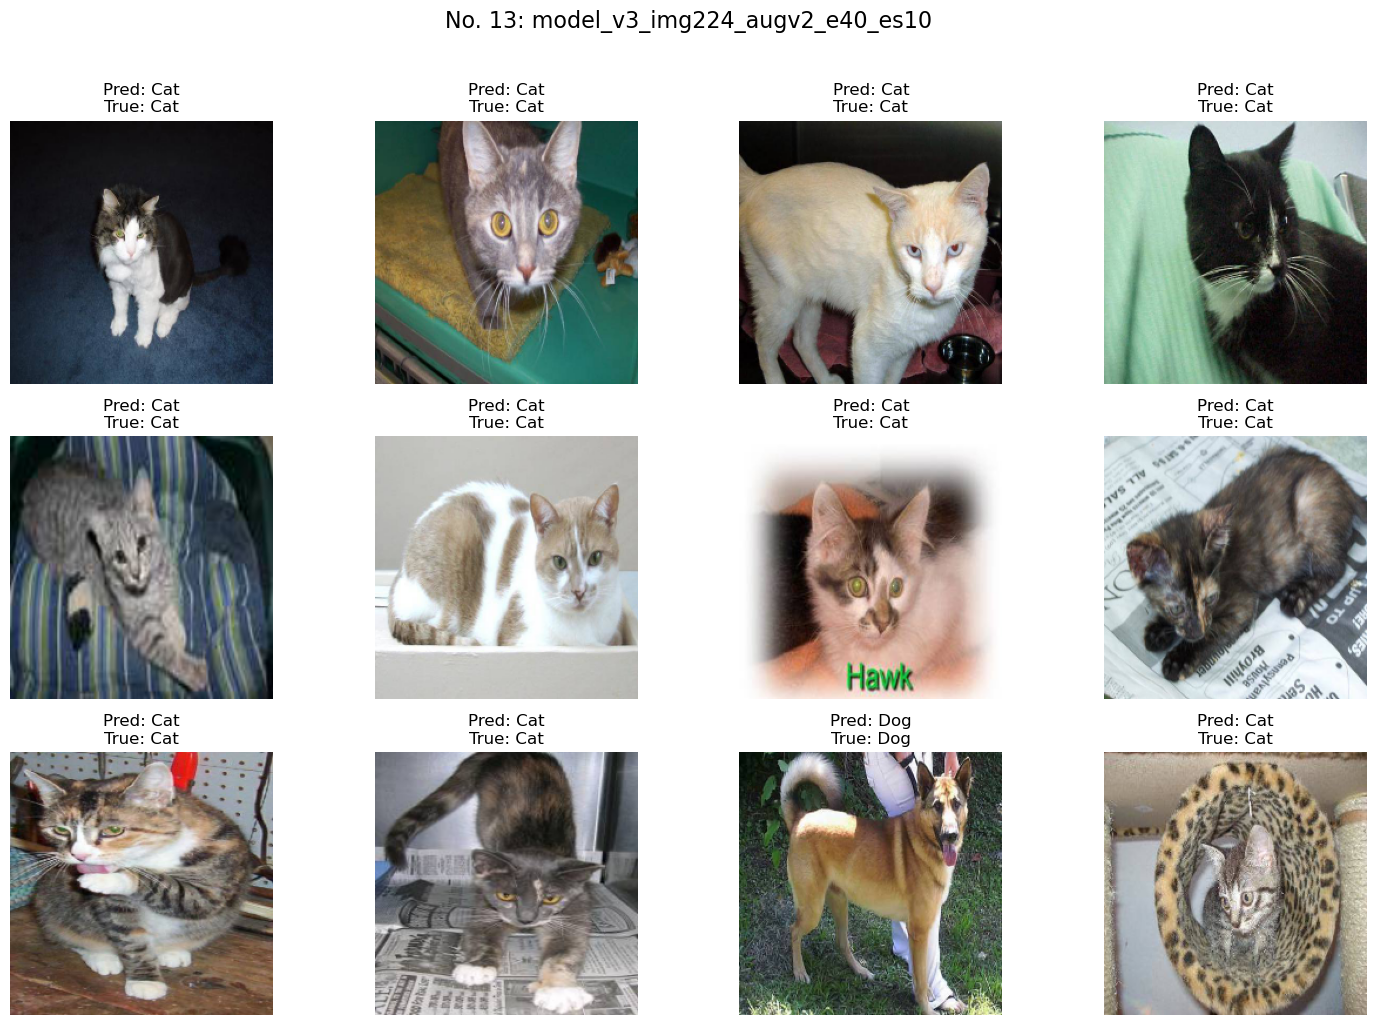

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


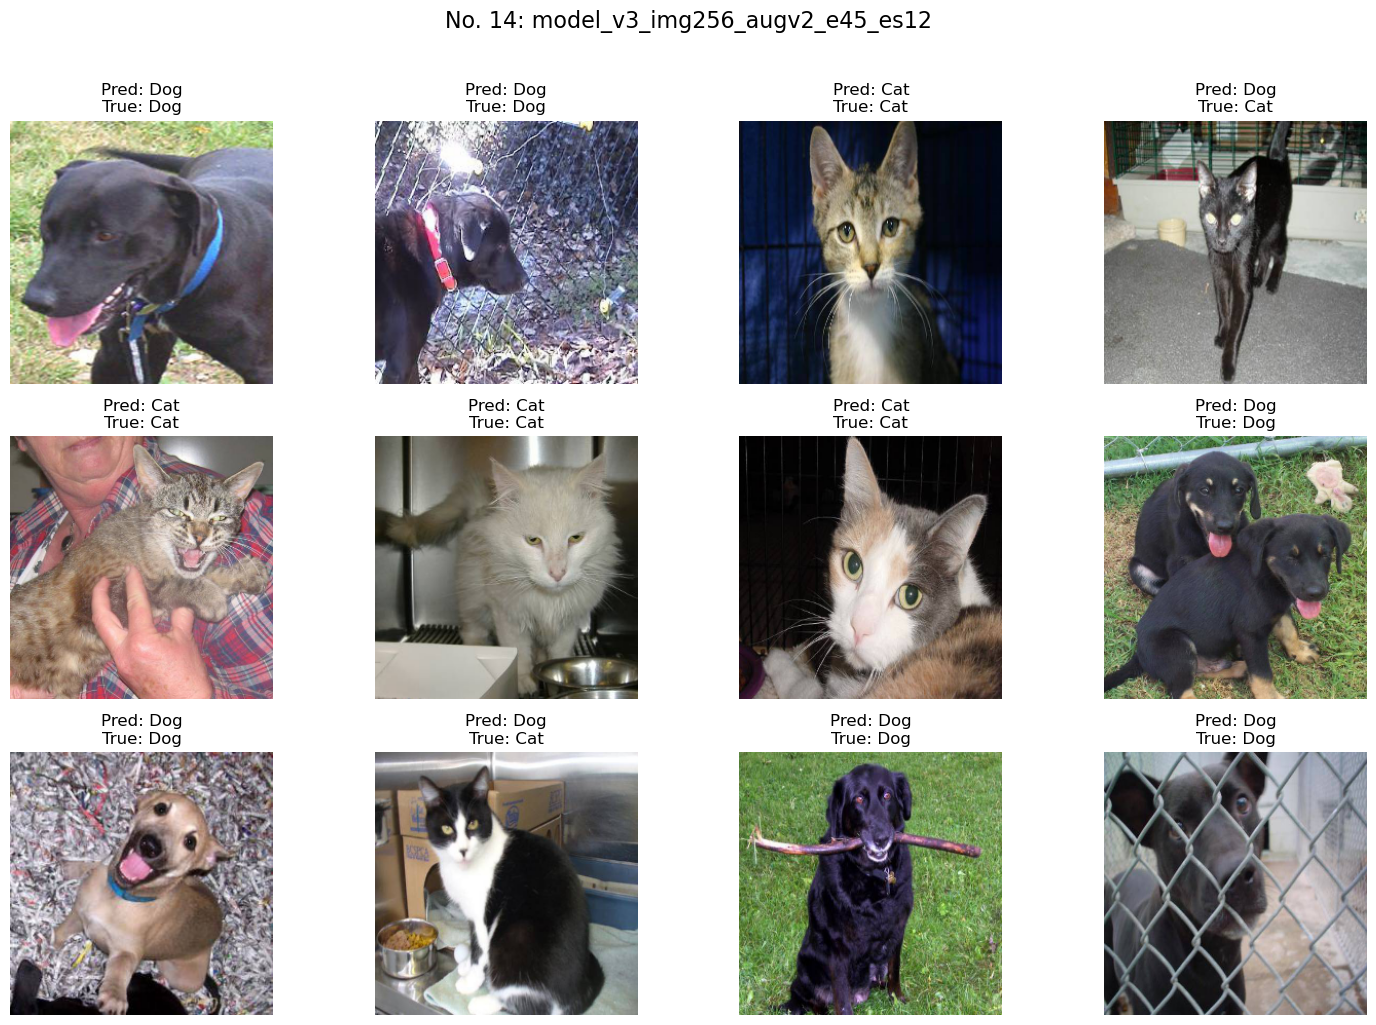

2025-06-14 00:06:11.851081: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [52]:
# Use unnormalized datasets to visualize actual image content
show_predictions(model_v3_img224_augv2_e40_es10, test_dataset_224, class_names=class_names,title = "No. 13: model_v3_img224_augv2_e40_es10")
show_predictions(model_v3_img256_augv2_e45_es12, test_dataset_256, class_names=class_names,title = "No. 14: model_v3_img256_augv2_e45_es12")

### 🔍 Comparison: Model No. 13 vs Model No. 14 – Final Test Evaluation

| Model No. | Model Name                     | Precision | F1-Score |
|-----------|--------------------------------|-----------|----------|
| No. 13    | model_v3_img224_augv2_e40_es10 | 95.7%     | 94.9%    |
| No. 14    | model_v3_img256_augv2_e45_es12 | 94.0%     | 94.6%    |

---

### 🔢 Confusion Matrix (Test Set)

|                 | Pred: Cat | Pred: Dog |
|-----------------|-----------|-----------|
| **True: Cat**   | 2395      | 105       |
| **True: Dog**   | 150       | 2350      |
| *(Model 13)*    |           |           |

|                 | Pred: Cat | Pred: Dog |
|-----------------|-----------|-----------|
| **True: Cat**   | 2348      | 152       |
| **True: Dog**   | 121       | 2379      |
| *(Model 14)*    |           |           |

---

### ✅ Summary

While Model No. 14 used higher-resolution input (256×256), it slightly underperformed compared to Model No. 13.  
Model No. 13 achieved both higher precision and a better F1-score, suggesting that:

- Further increasing image resolution did not yield proportional performance gains.
- The model trained on 224×224 input struck a better balance between expressiveness and generalization.
- Overfitting or diminished marginal returns may explain the drop in precision at higher resolution.

This highlights the importance of tuning not only the architecture but also the input size for optimal real-world performance.

---

### 🙏 Thanks for Reading

This notebook was a hands-on exploration of CNN-based image classification, built from scratch with modular design and iterative experiments. I hope it offers clarity for those learning or benchmarking CNN models on real-world datasets.

If you found this helpful or have suggestions for improvement, feel free to connect or reach out.

🔗 [LinkedIn – Bo Fu](https://www.linkedin.com/in/bofu/)  
📅 Completed: June 2025